In [1]:
# Importing all the libraries needed

import pandas as pd
import numpy as np 
import seaborn as sns
from functools import reduce
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_excel("housingdata.xlsx")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


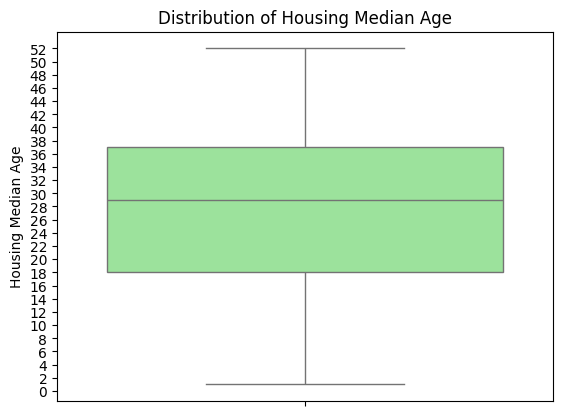

In [10]:
import numpy as np

# Creating a box plot to visualize the distribution of 'housing_median_age'
fig = sns.boxplot(y=housing['housing_median_age'], color='lightgreen')

# Customizing y-axis ticks
# Set the range and interval for y-axis ticks
y_tick = np.arange(0, housing['housing_median_age'].max() + 1, 2)

# Setting y-axis ticks with specific values or intervals
fig.set_yticks(y_tick)

# Setting graph labels and title for better understanding
fig.set(title='Distribution of Housing Median Age', ylabel='Housing Median Age')
plt.show()


The box plot displays the median, quartiles, and potential outliers in the 'housing_median_age' distribution.
It provides a clear visualization of the spread of the data and any extreme values or outliers.

 showing relation between median_income and median_house_values 

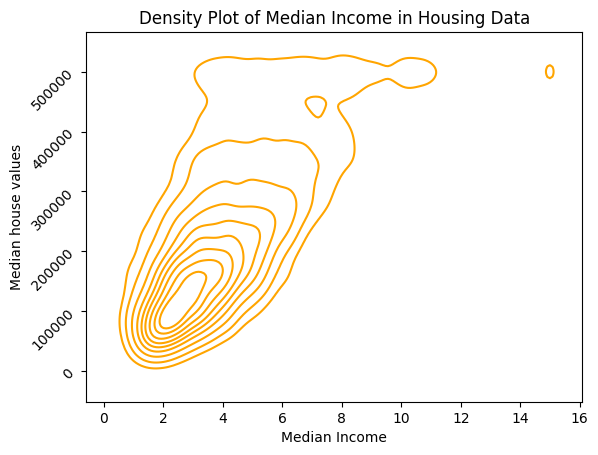

In [12]:
# used kernal density plot to show relation 
sns.kdeplot(housing,x='median_income', y='median_house_value', color='orange')

# Add axis labels and title
plt.xlabel("Median Income")
plt.ylabel("Median house values")
plt.title("Density Plot of Median Income in Housing Data")

# Rotated axis labels for better readability 
plt.yticks(rotation=45)
# Show the plot
plt.show()

As the median income increases, the median house value also generally goes up.
This means that higher-income earners tend to live in more expensive houses.

Droping the null values 

In [13]:
# Calculating null values in dataset 
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
bedrooms_na = housing[housing['total_bedrooms'].isnull()] #inner housing give only the null

bedrooms_na.to_excel('bedrooms_na.xlsx')

In [16]:
# Storing new dataset with dropped Null values of total bedrooms
housing1 = housing.dropna()

In [17]:
# Checking old dataset details to verify with new dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [18]:
# New dataset housing1 returns us 20433 rows, whereas we had 20640 rows previously
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


### Filling the missing data with the mean value of the total_bedrooms in the original data set.

In [19]:
Total_bedrooms_mean = housing['total_bedrooms'].mean()  #calculates the mean value of the 'total_bedrooms' 

housing_fill = housing.copy()  # Create a copy of the DataFrame to avoid modifying the original
housing_fill['total_bedrooms'].fillna(Total_bedrooms_mean, inplace=True) #fill fill the null values 

In [20]:
housing_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [21]:
# Checking for null values present in dataset
housing_fill.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
housing_fill.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [67]:
housing_fill.to_excel("housing_fill.xlsx")

### Created a user defined function to calculate the median value of the data set wherever required.

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


- The code defines a function, `calculating_median`, using NumPy's `np.median()` to find the median value of a dataset passed as an argument. 
- An dataset is passed as an input to `data`, and the function is called with this dataset, storing the calculated median in `median`, showcasing how the function can be used to determine the median of a given dataset efficiently.

In [24]:
import numpy as np

# Define a function to calculate the median
def calculating_median(data):
    median = np.median(data)
    return median

# Taking input for data
data = housing[input("Provide an column name to get median of the foll column--->")]

# Calculating the median for column given as input
data_median = calculating_median(data)

print(f"Median of the given input is :", data_median)

Median of the given input is : -118.49


### Ploted latitude versus longitude

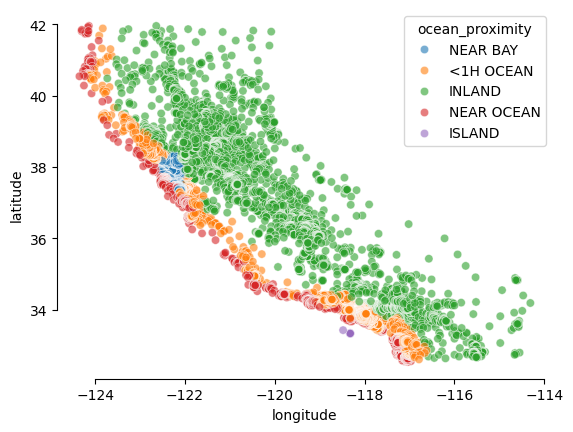

In [25]:
import seaborn as sns
sns.scatterplot(housing,x='longitude', y='latitude',hue='ocean_proximity',color='orange',alpha=0.6)
sns.despine(trim=True)  

### Created a data set for which the ocean_proximity is ‘Near ocean’.

In [26]:
# Filter the dataset where 'ocean_proximity' is 'Near Ocean' and storing it as an new excel file
near_ocean = housing[housing['ocean_proximity'] == 'NEAR OCEAN']

near_ocean.to_excel("near_ocean.xlsx")

near_ocean.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN


### Finding the mean and media value of the median income for the data set

In [27]:
Mean_median_income = near_ocean['median_income'].mean()

print("Mean Value of Median income of landsites Near Ocean is -->",Mean_median_income)

Median_median_incomes = near_ocean['median_income'].median()

print("Median Value of Median income of landsites Near Ocean is -->",Median_median_incomes)

Mean Value of Median income of landsites Near Ocean is --> 4.0057848006019565
Median Value of Median income of landsites Near Ocean is --> 3.64705


###  Divided the bedrooms sizes into three parts and created a new columns named total_bedroom_size.
- If the total bedrooms =< 10 , it should be quoted as small.
- If the total bedrooms is 11 or more but less than 1000, it should be medium. 
- Otherwise it should be considered large.

In [28]:
def bedroom_size(total_bedrooms):
    if total_bedrooms <= 10:
        return 'small'
    if 11 <= total_bedrooms < 1000:
        return 'medium'
    else:
        return 'large'

# Create the new column 'total_bedroom_size' using the function
housing_fill['total_bedroom_size'] = housing_fill['total_bedrooms'].apply(bedroom_size)

# Exporting new dataset with new column 
housing_fill.to_excel("Bedroom_size_housing_fill.xlsx")

# Display the first few rows of the dataset with the new column
print(housing_fill[['total_bedrooms', 'total_bedroom_size']].head(20))


    total_bedrooms total_bedroom_size
0            129.0             medium
1           1106.0              large
2            190.0             medium
3            235.0             medium
4            280.0             medium
5            213.0             medium
6            489.0             medium
7            687.0             medium
8            665.0             medium
9            707.0             medium
10           434.0             medium
11           752.0             medium
12           474.0             medium
13           191.0             medium
14           626.0             medium
15           283.0             medium
16           347.0             medium
17           293.0             medium
18           455.0             medium
19           298.0             medium
